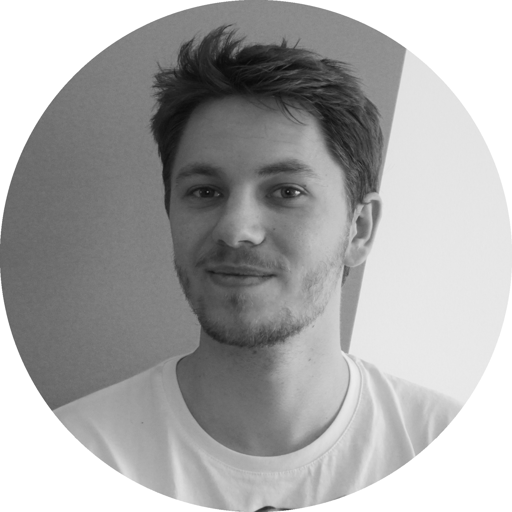

In [44]:
import torch
from PIL import Image
from torchvision.transforms.functional import pil_to_tensor, to_pil_image

pil_img = Image.open("assets/Alan.png").convert("L").resize((512, 512))
pil_img

torch.Size([1, 1, 512, 512]) torch.uint8
torch.Size([1, 1, 3, 3]) torch.uint8


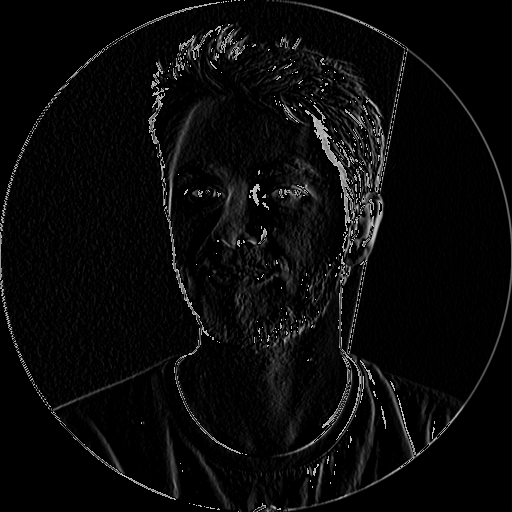

In [50]:
img = pil_to_tensor(pil_img).unsqueeze(0)

fX = torch.tensor([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]).byte().unsqueeze(0).unsqueeze(0)

def sobel(img, kernel, threshold=200):
    print(img.shape, img.dtype)
    print(fX.shape, fX.dtype)
    out_img = torch.nn.functional.conv2d(img, kernel, padding=1).squeeze(0)
    out_img[out_img > threshold] = 0
    return out_img

to_pil_image(sobel(img, fX))

torch.Size([1, 1, 512, 512]) torch.uint8
torch.Size([1, 1, 3, 3]) torch.uint8


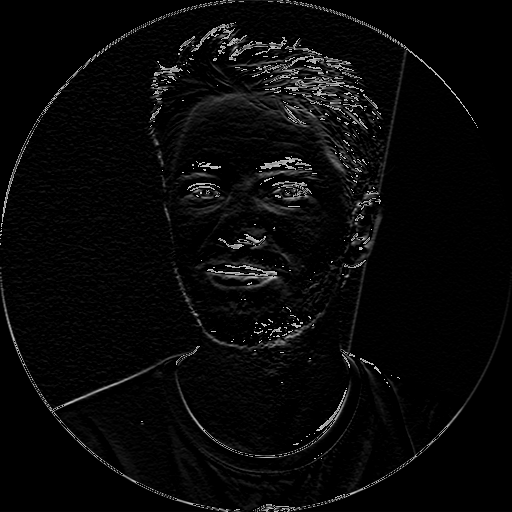

In [51]:
fY = torch.tensor([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]]).byte().unsqueeze(0).unsqueeze(0)

to_pil_image(sobel(img, fY))

torch.Size([1, 1, 512, 512]) torch.uint8
torch.Size([1, 1, 3, 3]) torch.uint8
torch.Size([1, 1, 512, 512]) torch.uint8
torch.Size([1, 1, 3, 3]) torch.uint8


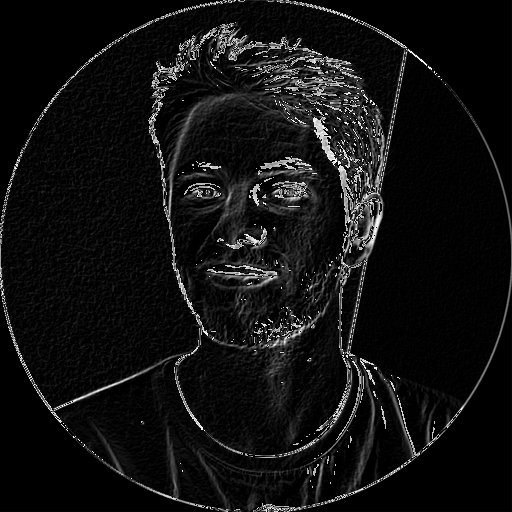

In [52]:
to_pil_image(sobel(img, fX) + sobel(img, fY))